### Quantum Cryptography Overview

Quantum cryptography leverages the principles of quantum mechanics to ensure secure communication. Unlike classical cryptography, which relies on mathematical algorithms for security, quantum cryptography uses quantum states, such as qubits, to encode and transmit information. Its most famous protocol, **BB84**, enables two parties to share a secret key that is provably secure against eavesdropping.

Key advantages of quantum cryptography include:
- **Unbreakable Security**: Any attempt to intercept or measure quantum states disturbs them, making eavesdropping detectable.
- **Future-Proofing**: Resistant to attacks from quantum computers that could break classical encryption.

Quantum cryptography is poised to revolutionize secure communication, particularly for critical systems like banking, healthcare, and government.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
num_qubits = 10  # Number of qubits to send
np.random.seed(42)  # For reproducibility

# Step 1: Sheldon's random bit and basis generation
sheldon_bits = np.random.randint(2, size=num_qubits)  # Random bits (0 or 1)
sheldon_bases = np.random.choice(['X', 'Z'], size=num_qubits)  # Random bases

# Step 2: Prepare qubits based on Sheldon's bits and bases
circuits = []
for bit, basis in zip(sheldon_bits, sheldon_bases):
    qc = QuantumCircuit(1, 1)
    if bit == 1:
        qc.x(0)  # Encode 1 with an X gate
    if basis == 'X':
        qc.h(0)  # Change to X basis
    circuits.append(qc)

# Step 3: Leonard's random basis choice
leonard_bases = np.random.choice(['X', 'Z'], size=num_qubits)

# Step 4: Leonard measures the qubits
results = []
simulator = AerSimulator()

for qc, leonard_basis in zip(circuits, leonard_bases):
    if leonard_basis == 'X':
        qc.h(0)  # Change to X basis for measurement
    qc.measure(0, 0)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    measured_bit = max(counts, key=counts.get)  # Get the most frequent measurement
    results.append(int(measured_bit))

# Step 5: Sheldon and Leonard publicly compare bases
matching_indices = [i for i in range(num_qubits) if sheldon_bases[i] == leonard_bases[i]]
shared_key = [results[i] for i in matching_indices]

In [3]:
# Display Results
print("Sheldon's bits:     ", sheldon_bits)
print("Sheldon's bases:    ", sheldon_bases)
print("Leonard's bases:    ", leonard_bases)
print("Measured results:   ", results)
print("Matching indices:   ", matching_indices)
print("Shared secret key:  ", shared_key)

Sheldon's bits:      [0 1 0 0 0 1 0 0 0 1]
Sheldon's bases:     ['X' 'X' 'X' 'X' 'Z' 'X' 'Z' 'Z' 'Z' 'X']
Leonard's bases:     ['Z' 'X' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z']
Measured results:    [1, 1, 1, 0, 0, 1, 0, 0, 0, 1]
Matching indices:    [1, 4, 6, 7, 8]
Shared secret key:   [1, 0, 0, 0, 0]


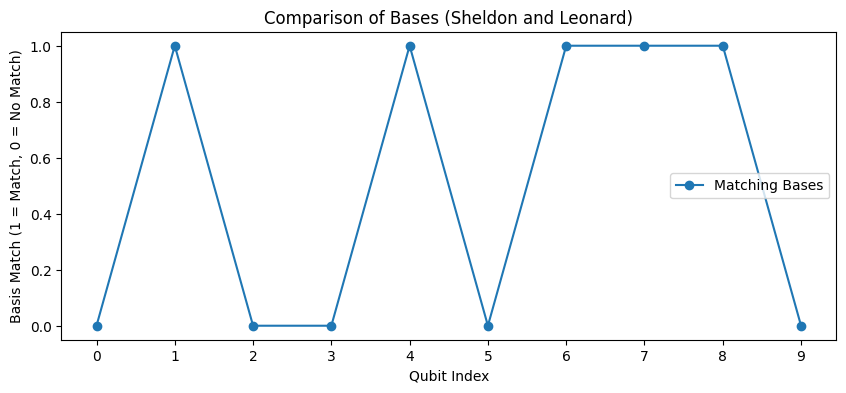

In [4]:
# Visualization: Basis Comparison
plt.figure(figsize=(10, 4))
plt.plot(range(num_qubits), [1 if sheldon_bases[i] == leonard_bases[i] else 0 for i in range(num_qubits)],
         marker='o', linestyle='-', label='Matching Bases')
plt.xticks(range(num_qubits))
plt.xlabel("Qubit Index")
plt.ylabel("Basis Match (1 = Match, 0 = No Match)")
plt.title("Comparison of Bases (Sheldon and Leonard)")
plt.legend()
plt.show()